如果你使用vscode运行本笔记本，请为vscode安装Jupyter Notebook Renderers插件，否则看不到plotly的输出

列出12个可视化的基本信息，包括
- 每个可视化本身的类型，
- 组员选择这些类型的可视化的原因，
- 每个可视化所采用的数据类型，
- 选择这些数据的原因，
- 以及对这些可视化的预期（每个可视化选择的数据和个人收入呈现何种关系，在可视化中会如何体现）

- 使用平行坐标图（或马赛克图），展示职业（occupation）和雇主类型（workclass）对收入的影响。采用的数据类型：职业（occupation）、雇主类型（workclass）、收入（income）。选择此可视化和数据的原因：职业和雇主类型是和收入最直接相关的信息，希望能揭示他们之间的关系，确定目标人群的职业。预期：高技能要求的职业和管理职业应该会比其他职业收入高。政府雇员和私企哪个收入高是很有意思的一点
- 使用树状图（treemap），展示职业（occupation）和原生国籍（native-country）的关系，每种职业里国籍分布有多少。采用数据类型：职业、原生国籍。选择此可视化和数据的原因：上一个可视化确定了目标职业，这一个可视化希望通过确定目标职业的主要国籍，来更好地制定营销策略，以更好地覆盖目标人群。预期：不同国家的人在就业时有类似偏好，如中国人可能专业技术类职业较多。
- 使用基于像素的图，展示职业（occupation）和教育程度（education）的关系，采用数据类型：职业、教育程度。选择此可视化和数据的原因：在获得高收入职业之后，通过挖掘职业和教育程度之间的关系，我们可以得到目标职业的大部分人受教育程度是多少，以此推出相应的教育课程。另外我们也可以得到低教育群体的在哪些职业占比多，以推出相应的职业课程，提高他们的受教育程度，以提升他们的竞争力。预期：高收入群体的教育程度应该比较高

In [1]:
%pip install plotly==5.15.0

Note: you may need to restart the kernel to use updated packages.


In [35]:
import sqlite3
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import plotly.express as px
from pprint import pprint

In [3]:
df = pd.read_csv('./data/adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [34]:


columns = [
"age",  # 年龄, int
"workclass",  # 雇主类型、雇佣类型，离散
"fnlwgt", #人口普查员认为观测值的人数，int
"education",  # 教育程度，离散
"education-num", # 受教育年限，int
"marital-status",  # 婚姻状况，离散
"occupation",  # 职业，离散
"relationship",  #家庭角色，离散
"race",  # 种族， 离散
"sex", # 性别， 离散
"capital-gain", # 资本收益， 数值
"capital-loss", # 资本损失， 数值
"hours-per-week", # 每周工作时间， int
"native-country", # 原生国籍，离散 
"income" # 收入是否大于50K， 布尔
]



# enum_columns = [
# "workclass",  # 雇主类型、雇佣类型，离散
# "education",  # 教育程度，离散
# "marital-status",  # 婚姻状况，离散
# ]

def preprocessing_data():
    df = pd.read_csv('./data/adult.data', header=None)

    df.columns = columns

    # 进行数据清洗，过滤掉为取值为 ? 的数据
    # 第一步需要先去掉所有value值中空格
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    # 统计过滤前的数据量
    print("adult_df过滤前的数据量：", df.shape[0])

    # 将 ? 替换为 np.nan
    df = df.replace("?", np.nan)

    # 过滤掉为 np.nan 的数据
    df_filter = df.dropna()

    # 统计过滤后的数据量
    print("adult_df过滤后的数据量：", df_filter.shape[0])

    # 统计异常数据占比（按照百分比输出）
    print("adult_df异常数据占比：", (1 - df_filter.shape[0] / df.shape[0]) * 100, "%")

    print(df.columns)
    print(df["income"].unique())
    print(df["native-country"].unique())
    print(df['age'].unique())

    # 将salary列的值转换为bool值
    # df["income>50K"] = np.where(df["income"] == ' <=50K', False, True)
    # df.drop("income", axis=1, inplace=True)

    display(df)
    return df

df = preprocessing_data()


adult_df过滤前的数据量： 32561
adult_df过滤后的数据量： 30162
adult_df异常数据占比： 7.367709836921465 %
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
['<=50K' '>50K']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


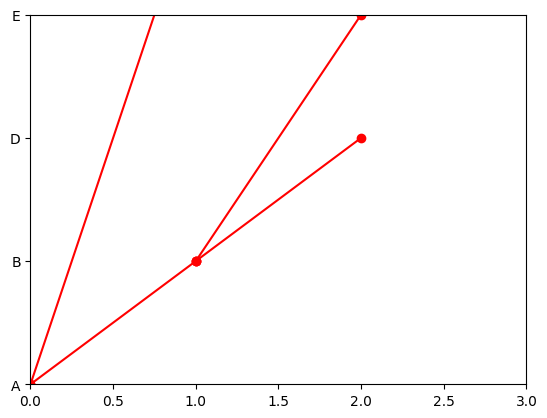

In [7]:
# 使用展示不同类型的人所占比例



In [3]:
# 使用平行线图，展示不同参数对收入的影响

df = px.data.iris()
display(df.head())
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [5]:
import plotly.express as px
df = px.data.tips()
display(df.head())
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
import plotly.express as px
import plotly.graph_objects as go

rendered_columns = [
# "age_bin",  # 年龄, int  转离散
"workclass",  # 雇主类型、雇佣类型，离散
# "fnlwgt", #人口普查员认为观测值的人数，int
# "education",  # 教育程度，离散
# "education-num", # 受教育年限，int， 转离散
# "edu_years_bin",
# "marital-status",  # 婚姻状况，离散
"occupation",  # 职业，离散
# "relationship",  #家庭角色，离散
# "race",  # 种族， 离散
# "sex", # 性别， 离散
# "capital-gain", # 资本收益， 数值
# "capital-loss", # 资本损失， 数值
# "hours-per-week", # 每周工作时间， int  转离散
# "work_hour_bin",
# "native-country", # 原生国籍，离散 
"income" # 收入是否大于50K， 布尔
]

continuous_cols = [
"age",  # 年龄, int  转离散
"education-num", # 受教育年限，int， 转离散
"hours-per-week", # 每周工作时间， int  转离散
]

min_value = df["age"].min()
max_value = df["age"].max()
print(min_value, max_value)
# 年龄分段
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
print(age_bins)
df['age_bin'] = pd.cut(df["age"], bins=age_bins, labels=age_labels)

display(df.head(10))


print('受教育年限')
print(df['education-num'].min(), df['education-num'].max())
edu_bins = [0, 6, 9, 12, 16, 30]
edu_labels = ['0-6', '6-9', '9-12', '12-16', '16+']
df['edu_years_bin'] = pd.cut(df["education-num"], bins=edu_bins, labels=edu_labels)



print('工作时间')
print(df['hours-per-week'].min(), df['hours-per-week'].max())
work_hour_bins = [0, 10, 20, 30, 40, 50, 60, 168]
work_hour_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
df['work_hour_bin'] = pd.cut(df["hours-per-week"], bins=work_hour_bins, labels=work_hour_labels)

# df = px.data.tips()

pprint(px.colors.qualitative.Plotly)



df["income>50K"] = np.where(df["income"] == ' <=50K', 0, 1)
display(df.head())


# dims
workclass_dim = go.parcats.Dimension(
    values=df['workclass'],
    categoryorder='category ascending', label="workclass"
)
occupation_dim = go.parcats.Dimension(values=df['occupation'], label="occupation")
income_dim = go.parcats.Dimension(values=df['income'], label="income")

# line color
color = df.income;
color_map = df.income.map({'<=50K': 'lightsteelblue', '>50K':'mediumseagreen'})
colorscale = [['<=50K', 'lightsteelblue'], ['>50K', 'mediumseagreen']];

# draw
fig = go.Figure(data = [go.Parcats(dimensions=[workclass_dim, occupation_dim, income_dim],
        line={'color': color_map},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

# fig = px.parallel_categories(data_frame=df.head(10000), dimensions=rendered_columns, color="education-num")

# fig = px.parallel_categories(data_frame=df.head(100), dimensions=rendered_columns, color='age')

fig.show()

17 90
[10, 20, 30, 40, 50, 60, 70, 80, 90]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,edu_years_bin,work_hour_bin,income>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39,12-16,30-40,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-49,12-16,10-20,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39,6-9,30-40,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59,6-9,30-40,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-29,12-16,30-40,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,30-39,12-16,30-40,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,40-49,0-6,10-20,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,50-59,6-9,40-50,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,30-39,12-16,40-50,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,40-49,12-16,30-40,1


受教育年限
1 16
工作时间
1 99
['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,edu_years_bin,work_hour_bin,income>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39,12-16,30-40,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-49,12-16,10-20,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39,6-9,30-40,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-59,6-9,30-40,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-29,12-16,30-40,1


In [28]:
import plotly.express as px
df = px.data.tips()
display(df.head(10))
fig = px.scatter(df, x="total_bill", y="tip", color="smoker",
                 title="String 'smoker' values mean discrete colors")

fig.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [33]:
import plotly.express as px

df = px.data.tips()
display(df.head(10))
fig = px.parallel_categories(df, dimensions=['sex', 'smoker', 'day'],
                color="size", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'})
fig.show()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
